This notebook is part prototyping, part first-pass analysis for the ALS target CRISPR screen and associated controls being performed by Billy

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib as np
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')

In [79]:
markers = ['o', 'v', '^', "<", ">", "s", "p", "P", "*", "X", "D", "s", "p", "P", "*", "X", "D"]

# Intensity measurement on (whole image) soma segment

In [80]:
dyes = [['Lysosensor', 'CellROX'],
        ['TMRM', 'Syto']]
measurement = 'Intensity_MedianIntensity_'
# Load processed cellprofiler data from csv
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_image/2022-08-16_soma_image_Image.csv'
data = pd.read_csv(data_path)

# Set index to well name
# quick hack, using known indices of plate and well name within filenames
data.index = data['FileName_TMRM'].str[:7] + data['FileName_TMRM'].str[14:18]

# Discard all columns except median intensity.
# future analyses will have better curated feature sets
data = data.iloc[:,data.columns.str.startswith(measurement)]
data = data.drop(columns='Intensity_MedianIntensity_Threshold')

In [81]:
# Load platemap / well conditions
pm = pd.read_csv('/fsx/raw-data/220811 96w 9 Gene KO /220811 well conditions.csv', index_col=0, header=None)
# Add condition labels to well dataframe
data['conditions'] = pm.reindex(data.index)

Text(0.5, 0.98, 'Median Intensity - soma segment')

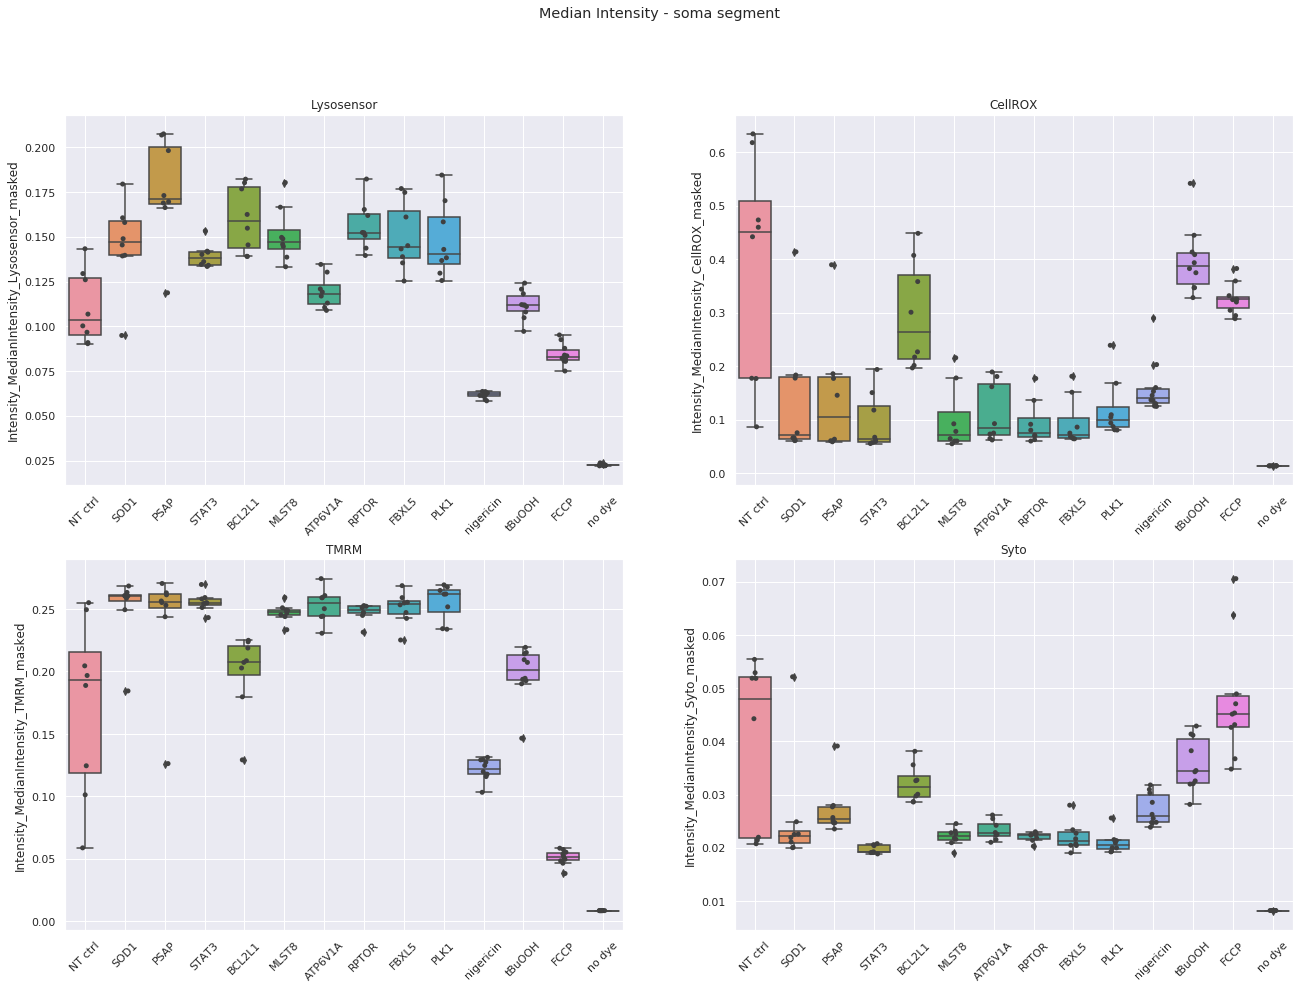

In [82]:
fig, ax = plt.subplots(2,2, figsize=(22,15))     
        
for x_plot in range(len(dyes)):
    for y_plot in range(len(dyes[x_plot])):
        plt.sca(ax[x_plot, y_plot])
        d = dyes[x_plot][y_plot]
        sns.boxplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d + '_masked']).set_title(d)
        sns.stripplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d + '_masked'], color="0.25")
        plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)
        plt.xlabel('')
        ax[x_plot, y_plot].xaxis.grid(True)
        
fig.suptitle('Median Intensity - soma segment')


# Intensity measurement on segmented soma

In [83]:
dyes = [['LysoSensor', 'CellROX'],
        ['TMRM', 'Syto']]
measurement = 'Intensity_MedianIntensity_'
# Load processed cellprofiler soma data from csv
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_objects/2022-08-16_soma_objects_soma.csv'
soma_data = pd.read_csv(data_path)
soma_data.index = soma_data['ImageNumber']
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_objects/2022-08-16_soma_objects_Image.csv'
image_data = pd.read_csv(data_path)
image_data.index = image_data['ImageNumber']

# Convert from per-soma measuremnt to per-image measurements
data = pd.DataFrame(data = 0, index=image_data.index, columns=soma_data.columns)
for i in image_data.index:
    data.loc[i] = soma_data.loc[i].mean(axis=0)
    
# Set index to well name
# quick hack, using known indices of plate and well name within filenames
data.index = image_data['FileName_TMRM'].str[:7] + image_data['FileName_TMRM'].str[14:18]

# Discard all columns except median intensity.
# future analyses will have better curated feature sets
data = data.iloc[:,data.columns.str.startswith(measurement)]

In [84]:
# Load platemap / well conditions
pm = pd.read_csv('/fsx/raw-data/220811 96w 9 Gene KO /220811 well conditions.csv', index_col=0, header=None)
# Add condition labels to well dataframe
data['conditions'] = pm.reindex(data.index)

Text(0.5, 0.98, 'Median Intensity - individual soma')

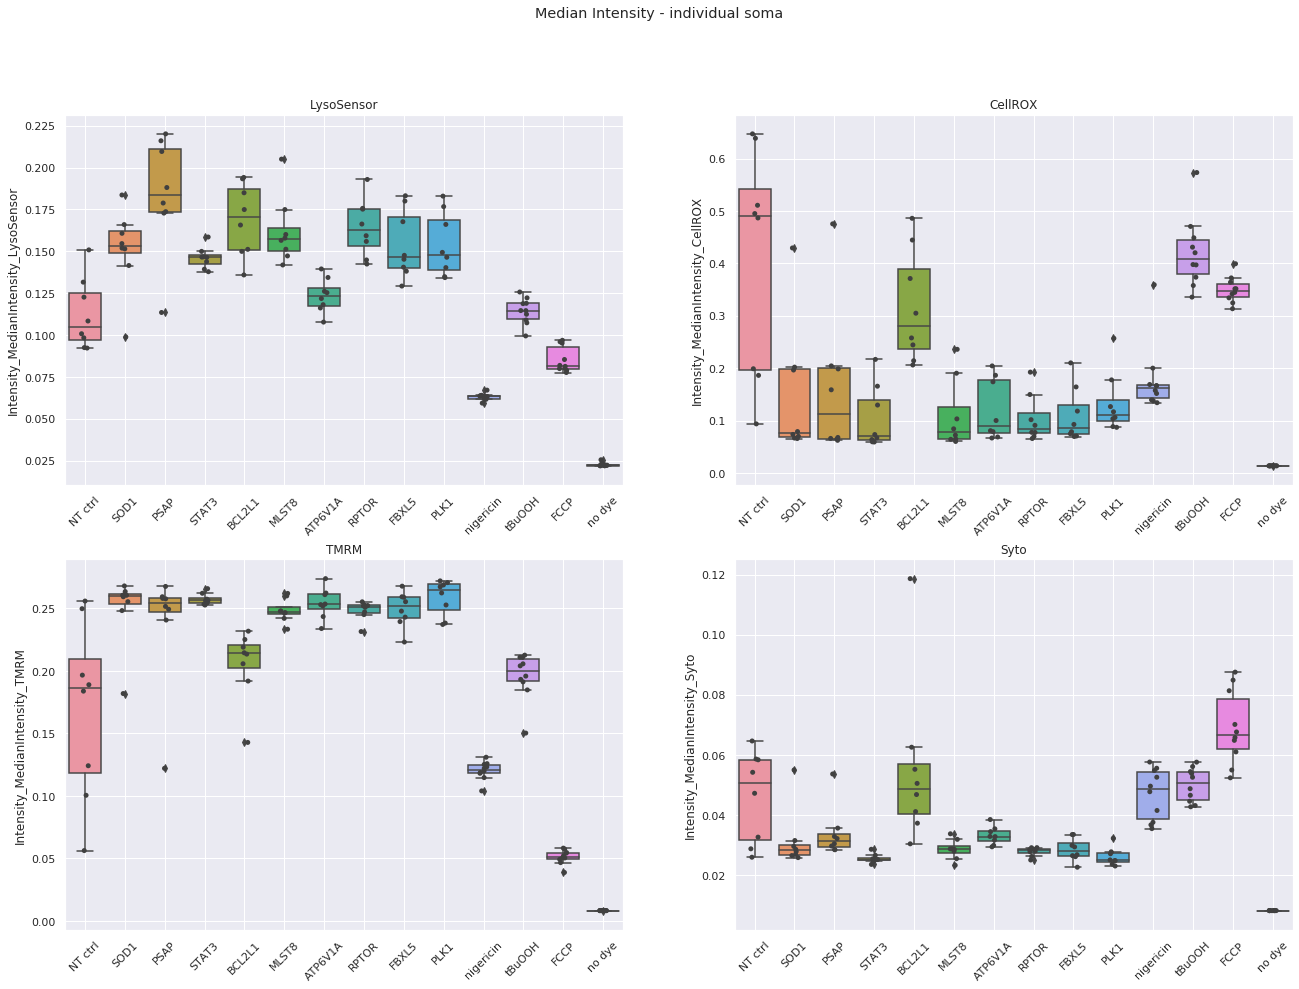

In [85]:
fig, ax = plt.subplots(2,2, figsize=(22,15))     
        
for x_plot in range(len(dyes)):
    for y_plot in range(len(dyes[x_plot])):
        plt.sca(ax[x_plot, y_plot])        
        d = dyes[x_plot][y_plot]
        sns.boxplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d]).set_title(d)
        sns.stripplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d], color="0.25")
        plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)
        plt.xlabel('')
        ax[x_plot, y_plot].xaxis.grid(True)

fig.suptitle('Median Intensity - individual soma')

# Intensity measurement on neurite segment

In [86]:
dyes = [['LysoSensor', 'CellROX'],
        ['TMRM', 'Syto']]
measurement = 'Intensity_MedianIntensity_'
# Load processed cellprofiler data from csv
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/neurite_segment/2022-08-16_neurite_segment_Image.csv'
data = pd.read_csv(data_path)

# Set index to well name
# quick hack, using known indices of plate and well name within filenames
data.index = data['FileName_TMRM'].str[:7] + data['FileName_TMRM'].str[14:18]

# Discard all columns except median intensity.
# future analyses will have better curated feature sets
data = data.iloc[:,data.columns.str.startswith(measurement)]

In [87]:
# Load platemap / well conditions
pm = pd.read_csv('/fsx/raw-data/220811 96w 9 Gene KO /220811 well conditions.csv', index_col=0, header=None)
# Add condition labels to well dataframe
data['conditions'] = pm.reindex(data.index)

In [88]:
data.iloc[101,:] = data.iloc[100,:]

Text(0.5, 0.98, 'Median Intensity - neurite segment')

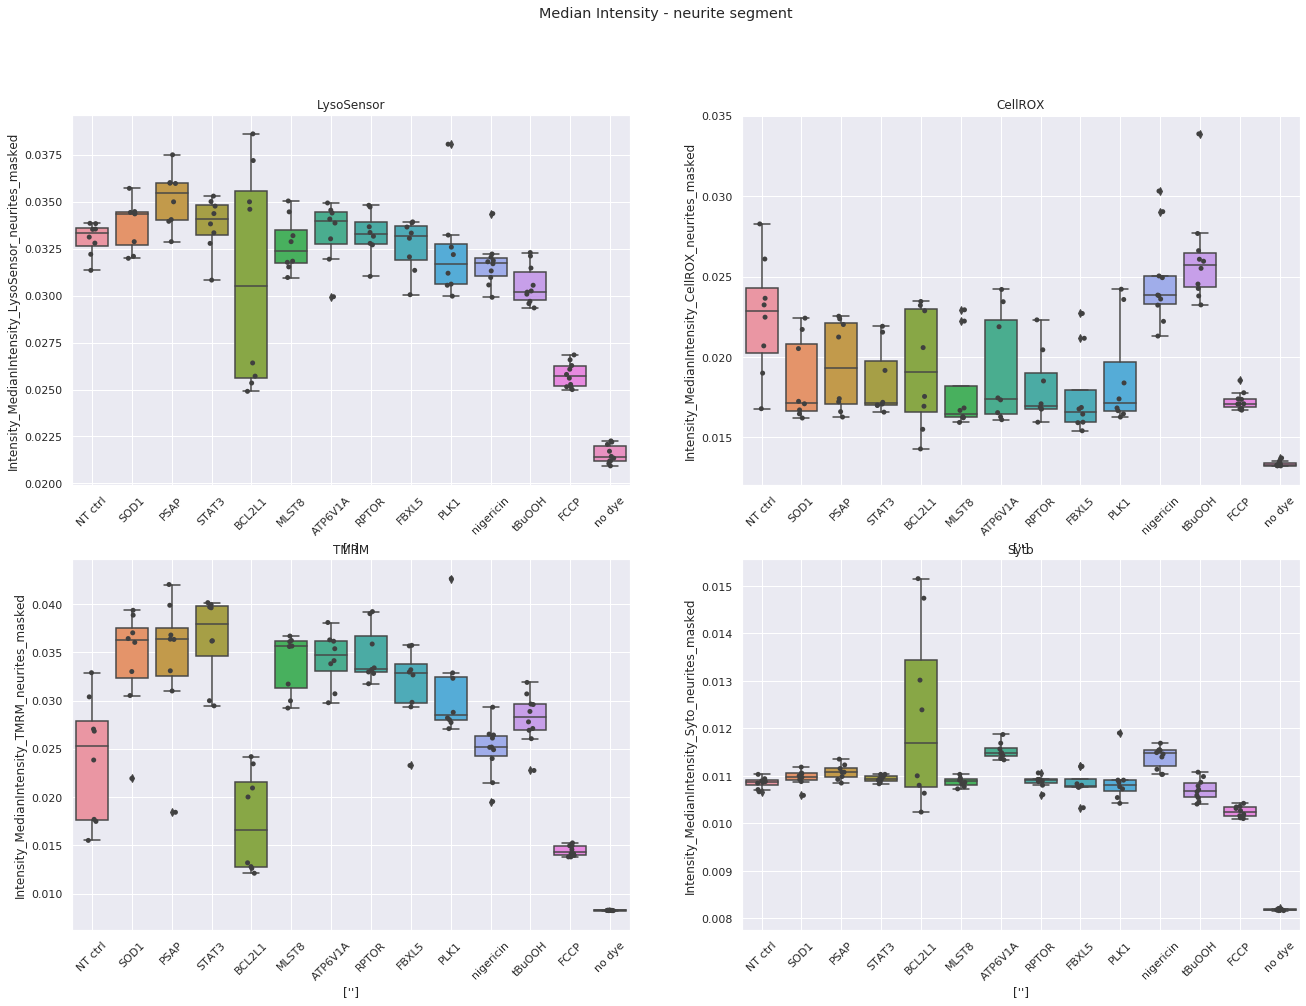

In [89]:
fig, ax = plt.subplots(2,2, figsize=(22,15))     
        
for x_plot in range(len(dyes)):
    for y_plot in range(len(dyes[x_plot])):
        plt.sca(ax[x_plot, y_plot])        
        d = dyes[x_plot][y_plot]
        sns.boxplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d + '_neurites_masked']).set_title(d)
        sns.stripplot(ax=ax[x_plot,y_plot], x=data['conditions'], y=data[measurement + d + '_neurites_masked'], color="0.25")
        plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)
        plt.xlabel([''])
        ax[x_plot, y_plot].xaxis.grid(True)

fig.suptitle('Median Intensity - neurite segment')

In [90]:
measurement = 'Count_soma'
# Load processed cellprofiler data from csv
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_objects/2022-08-16_soma_objects_Image.csv'
data = pd.read_csv(data_path)

# Set index to well name
# quick hack, using known indices of plate and well name within filenames
data.index = data['FileName_TMRM'].str[:7] + data['FileName_TMRM'].str[14:18]

# Discard all columns except median intensity.
# future analyses will have better curated feature sets
data = data.iloc[:,data.columns.str.startswith(measurement)]

In [91]:
# Load platemap / well conditions
pm = pd.read_csv('/fsx/raw-data/220811 96w 9 Gene KO /220811 well conditions.csv', index_col=0, header=None)
# Add condition labels to well dataframe
data['conditions'] = pm.reindex(data.index)

# Soma counts


Text(0.5, 1.0, 'Soma counts (per image)')

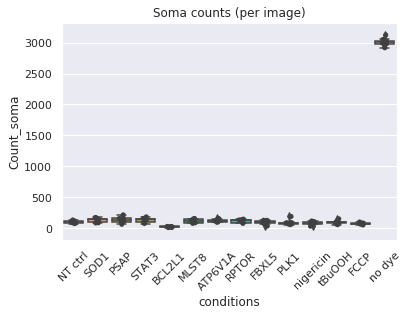

In [92]:
sns.boxplot(x=data['conditions'], y=data[measurement]).set_title(d)
sns.stripplot(x=data['conditions'], y=data[measurement], color="0.25")
plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)

plt.title('Soma counts (per image)')

In [93]:
data.index = data.conditions
data = data.drop(index=13)

Text(0.5, 1.0, 'Soma counts (per image)')

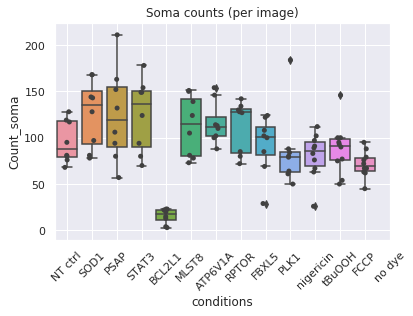

In [94]:
sns.boxplot(x=data['conditions'], y=data[measurement]).set_title(d)
sns.stripplot(x=data['conditions'], y=data[measurement], color="0.25")
plt.xticks(range(14), ['NT ctrl', 'SOD1', 'PSAP', 'STAT3', 'BCL2L1', 'MLST8', 'ATP6V1A', 'RPTOR', 'FBXL5', 'PLK1', 'nigericin', 'tBuOOH', 'FCCP', 'no dye'], rotation=45)
ax = plt.gca()
ax.xaxis.grid(True)

plt.title('Soma counts (per image)')

# t-SNE on soma features

In [95]:
dyes = [['LysoSensor', 'CellROX'],
        ['TMRM', 'Syto']]
measurement = 'Intensity_MedianIntensity_'
# Load processed cellprofiler soma data from csv
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_objects/2022-08-16_soma_objects_soma.csv'
soma_data = pd.read_csv(data_path)
soma_data.index = soma_data['ImageNumber']
data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-16/soma_objects/2022-08-16_soma_objects_Image.csv'
image_data = pd.read_csv(data_path)
image_data.index = image_data['ImageNumber']

# Convert from per-soma measuremnt to per-image measurements
data = pd.DataFrame(data = 0, index=image_data.index, columns=soma_data.columns)
for i in image_data.index:
    data.loc[i] = soma_data.loc[i].mean(axis=0)
    
# Set index to well name
# quick hack, using known indices of plate and well name within filenames
data.index = image_data['FileName_TMRM'].str[:7] + image_data['FileName_TMRM'].str[14:18]

# Load platemap / well conditions
pm = pd.read_csv('/fsx/raw-data/220811 96w 9 Gene KO /220811 well conditions.csv', index_col=0, header=None)
# Add condition labels to well dataframe
data['conditions'] = pm.reindex(data.index)

/tmp/ipykernel_1626/2599062900.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['conditions'] = pm.reindex(data.index)


In [96]:
data.columns.to_list()
data = data.drop(
    columns = 
    ['ImageNumber',
     'ObjectNumber',
     'AreaShape_Area',
     'AreaShape_BoundingBoxArea',
     'AreaShape_BoundingBoxMaximum_X',
     'AreaShape_BoundingBoxMaximum_Y',
     'AreaShape_BoundingBoxMinimum_X',
     'AreaShape_BoundingBoxMinimum_Y',
     'AreaShape_Center_X',
     'AreaShape_Center_Y',
     'Location_CenterMassIntensity_X_CellROX',
     'Location_CenterMassIntensity_X_LysoSensor',
     'Location_CenterMassIntensity_X_Syto',
     'Location_CenterMassIntensity_X_TMRM',
     'Location_CenterMassIntensity_Y_CellROX',
     'Location_CenterMassIntensity_Y_LysoSensor',
     'Location_CenterMassIntensity_Y_Syto',
     'Location_CenterMassIntensity_Y_TMRM',
     'Location_CenterMassIntensity_Z_CellROX',
     'Location_CenterMassIntensity_Z_LysoSensor',
     'Location_CenterMassIntensity_Z_Syto',
     'Location_CenterMassIntensity_Z_TMRM',
     'Location_Center_X',
     'Location_Center_Y',
     'Location_Center_Z',
     'Location_MaxIntensity_X_CellROX',
     'Location_MaxIntensity_X_LysoSensor',
     'Location_MaxIntensity_X_Syto',
     'Location_MaxIntensity_X_TMRM',
     'Location_MaxIntensity_Y_CellROX',
     'Location_MaxIntensity_Y_LysoSensor',
     'Location_MaxIntensity_Y_Syto',
     'Location_MaxIntensity_Y_TMRM',
     'Location_MaxIntensity_Z_CellROX',
     'Location_MaxIntensity_Z_LysoSensor',
     'Location_MaxIntensity_Z_Syto',
     'Location_MaxIntensity_Z_TMRM',
     'Number_Object_Number',
     'conditions']
)

In [97]:
data = data - data.mean(axis=0)
data = data / data.std(axis=0)

In [98]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=20)
latent_data = pca.fit_transform(data.iloc[:110,:]) # Excluding the no dye controls
embedded_data = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3, random_state=2).fit_transform(latent_data)

/home/ubuntu/miniconda3/envs/cell-imaging/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Text(0.5, 1.0, 'tSNE on soma features')

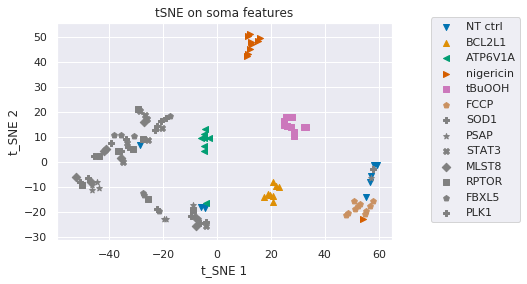

In [99]:
d = pd.DataFrame(embedded_data, index=pm.values[:110,0])
#sns.scatterplot(embedded_data[:,0], embedded_data[:,1])
i_marker = 1
for condition in [0,4,6,10,11,12]:
    plt.scatter(x=d.loc[condition].iloc[:,0], y=d.loc[condition].iloc[:,1], marker=markers[i_marker])
    i_marker += 1
for condition in [1,2,3,5,7,8,9]:
    plt.scatter(x=d.loc[condition].iloc[:,0], y=d.loc[condition].iloc[:,1], c='gray', marker=markers[i_marker])
    i_marker += 1
plt.legend(['NT ctrl','BCL2L1','ATP6V1A','nigericin','tBuOOH','FCCP','SOD1','PSAP','STAT3','MLST8','RPTOR','FBXL5','PLK1'], bbox_to_anchor=(1.1, 1.05))
plt.xlabel('t_SNE 1')
plt.ylabel('t_SNE 2')
plt.title('tSNE on soma features')

Text(0.5, 1.0, 'tSNE on soma features')

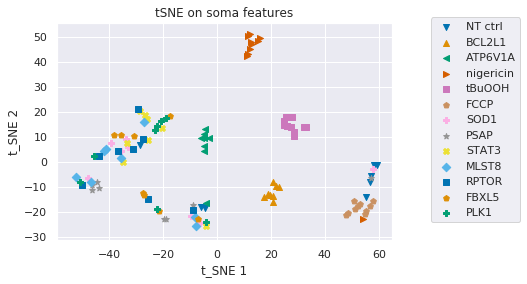

In [101]:
d = pd.DataFrame(embedded_data, index=pm.values[:110,0])
#sns.scatterplot(embedded_data[:,0], embedded_data[:,1])
i_marker = 1
for condition in [0,4,6,10,11,12]:
    plt.scatter(x=d.loc[condition].iloc[:,0], y=d.loc[condition].iloc[:,1], marker=markers[i_marker])
    i_marker += 1
for condition in [1,2,3,5,7,8,9]:
    plt.scatter(x=d.loc[condition].iloc[:,0], y=d.loc[condition].iloc[:,1], marker=markers[i_marker])
    i_marker += 1
plt.legend(['NT ctrl','BCL2L1','ATP6V1A','nigericin','tBuOOH','FCCP','SOD1','PSAP','STAT3','MLST8','RPTOR','FBXL5','PLK1'], bbox_to_anchor=(1.1, 1.05))
plt.xlabel('t_SNE 1')
plt.ylabel('t_SNE 2')
plt.title('tSNE on soma features')